In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=6742841d59d4c5c76b6b66154bb0d39772d4d9b615e5763a29f832149f1a47eb
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook
import time
import pandas as pd

In [ ]:
# MODEL TRAINING

val = "/content/drive/MyDrive/ID_DATA/test/"
train = "/content/drive/MyDrive/ID_DATA/train/"

#dicts containing images that weren't and were detected
not_detected = {}
detected = {}

#Lists containing encodings and names of faces
face_encode = []
face_name = []

#Updating above lists
#Also training the model
for folder in tqdm_notebook(os.listdir(train)):
  temp_path = train+folder+'/'
  name = folder
  #face_name.append(folder)
  for file in os.listdir(temp_path):
    try:
      alu_image = face_recognition.load_image_file(temp_path+file)
      alu_face_encoding = face_recognition.face_encodings(alu_image)[0]
    except:
      if name not in not_detected.keys():
          not_detected[name]=[]
      not_detected[name].append(file)
      continue
    if name not in detected.keys():
      detected[name]=[]
    detected[name].append(file)
    face_encode.append(alu_face_encoding)
    face_name.append(folder)
        
        
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
print('Detected for {} members out of 33'.format(len(face_name)))
print('')

Detected for 65 members out of 33



In [ ]:
def predict(frame,face_encode,face_name):
    known_face_encodings = face_encode
    known_face_names = face_name
    
    img = frame
    
    face_locations = face_recognition.face_locations(img)
    face_encodings = face_recognition.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"

        # # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

    return face_names

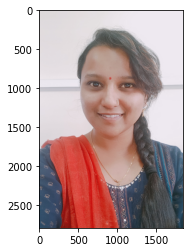

[0.76477385 0.82000779 0.81440174 0.70582981 0.64854048 0.92691838
 0.92469054 0.64706809 0.64299013 0.91450828 0.9030872  1.00985014
 0.99773474 0.92509761 0.89856934 0.92138857 0.93331273 0.76572236
 0.75173826 0.50406218 0.62682451 0.58776596 0.85815347 0.72796427
 0.65014091 0.66119139 0.70216969 0.69974843 0.5540234  0.57261718
 0.5575819  0.56930842 0.79724805 0.80678615 0.8345214  0.62941098
 0.60697851 0.65912418 0.63414198 0.89670153 0.86152178 0.85689121
 0.90197267 0.73523914 0.70848662 0.67490512 0.67878202 0.95587104
 0.92886404 0.8979785  0.88755562 0.90275835 0.7171927  0.71020571
 0.36619222 0.40951501 0.33346191 0.36462857 0.94344091 0.96143864
 0.74200643 0.72238622 0.8745506  0.85661876 0.85604362] 
 56


['Dnyaneshwari Laxman Patil']

In [ ]:
path = "/content/drive/MyDrive/ID_DATA/test/Dnyaneshwari Laxman Patil/Dnyana.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

predict(img,face_encode,face_name)

In [ ]:
# CHECKING ACCURACY

correct_count = 0
incorrect_count = 0
actual = len(face_name)
for folder in tqdm_notebook(os.listdir(val)):
    temp_path = val+folder+'/'
    name = folder
    for file in os.listdir(temp_path):
        
        img = cv2.imread(temp_path+file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        try:
            name = predict(img,face_encode,face_name)
        except Exception as e:
            print(e)
            continue
        if len(name)!=0 and name[0] == folder:
            correct_count+=1
        else:
            incorrect_count+=1
            
        print('Actual is:',folder,'\n Name is:',name,'\n***+***')
            
        
            
print('Accuracy is:', correct_count/actual *100)
print('Loss is:', incorrect_count/actual *100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/33 [00:00<?, ?it/s]

Actual is: Ughade Shital Sanjay 
 Name is: ['Ughade Shital Sanjay'] 
***+***
Actual is: Venu Gopal .P 
 Name is: ['Venu Gopal .P'] 
***+***
Actual is: V Ashok 
 Name is: ['V Ashok'] 
***+***
Actual is: zareena 
 Name is: ['zareena'] 
***+***
Actual is: Uday Gurav 
 Name is: ['Uday Gurav'] 
***+***
Actual is: Vijay Arun Mane 
 Name is: ['Vijay Arun Mane'] 
***+***
Actual is: Supriya Kanchan Topno 
 Name is: ['Supriya Kanchan Topno'] 
***+***
Actual is: Sarika Babaji Kadam 
 Name is: ['Sarika Babaji Kadam'] 
***+***
Actual is: Somesh 
 Name is: ['Somesh'] 
***+***
Actual is: Rajendra Beja 
 Name is: ['Rajendra Beja'] 
***+***
Actual is: Sivakumar C 
 Name is: ['Sivakumar C'] 
***+***
Actual is: S Ashwin Kumar 
 Name is: ['S Ashwin Kumar'] 
***+***
Actual is: Nitin salokhe 
 Name is: [] 
***+***
Actual is: Sasmita Kumari Guru 
 Name is: ['Sasmita Kumari Guru'] 
***+***
Actual is: Sai Deepika Pasamala 
 Name is: ['Sai Deepika Pasamala'] 
***+***
Actual is: Sunil Badaseth 
 Name is: ['Sunil

In [ ]:
# ACCURACY ON VAL DATA

print('Accuracy is:', correct_count/33 *100)
print('Loss is:', incorrect_count/33 *100)

Accuracy is: 96.96969696969697
Loss is: 3.0303030303030303


In [ ]:
# ACCURACY ON TRAIN DATA

print('Accuracy is:', correct_count/actual *100)
print('Loss is:', incorrect_count/actual *100)

Accuracy is: 101.53846153846153
Loss is: 1.5384615384615385
